This function evaluates a guess_word given a target_word (right answer) 

In [1]:
def wordle_feedback(target_word, guess_word):
    green = [(i, g) for i, (t, g) in enumerate(zip(target_word, guess_word)) if t == g]
    remaining = [(i, t, g) for i, (t, g) in enumerate(zip(target_word, guess_word)) if t != g]
    
    remaining_target = [t for i, t, g in remaining]
    yellow = []
    black = []

    for i, t, g in remaining:
        if g in remaining_target:
            yellow.append((i, g))
            remaining_target.remove(g)  # Remove the letter from the target list so it can't be used again
        else:
            black.append((i, g))

    return {"green": green, "yellow": yellow, "black": black}

# Testing
target_word = 'applp'
guess_word = 'ppppa'
print(wordle_feedback(target_word, guess_word))
target_word = 'applp'
guess_word = 'xxxxx'
print(wordle_feedback(target_word, guess_word))
target_word = 'applp'
guess_word = 'xxpxx'
print(wordle_feedback(target_word, guess_word))

{'green': [(1, 'p'), (2, 'p')], 'yellow': [(0, 'p'), (4, 'a')], 'black': [(3, 'p')]}
{'green': [], 'yellow': [], 'black': [(0, 'x'), (1, 'x'), (2, 'x'), (3, 'x'), (4, 'x')]}
{'green': [(2, 'p')], 'yellow': [], 'black': [(0, 'x'), (1, 'x'), (3, 'x'), (4, 'x')]}


This function checks to see if a word is consistent with a feed back dictionary as per above

In [2]:
def is_consistent(word, feedback):
    # Create list from word and a copy for yellow check
    word_list = list(word)
    remaining_letters = word_list.copy()

    # 'green' checks: correct letter must be at the correct index
    for index, letter in feedback['green']:
        if word_list[index] != letter:
            return False
        remaining_letters.remove(letter)  # Mark as used

    # 'yellow' checks: correct letter can't be at the same index, but must exist elsewhere
    for index, letter in feedback['yellow']:
        if word_list[index] == letter or letter not in remaining_letters:
            return False
        remaining_letters.remove(letter)  # Mark as used

    # 'black' checks: letter must not be in the word at all
    for index, letter in feedback['black']:
        if letter in remaining_letters:
            return False

    return True

# Testing
feedback = {"green": [(1, 'p'), (2, 'p')], "yellow": [(0, 'a')], "black": [(3, 'e'), (4, 'r')]}
word = 'apple'
print(is_consistent(word, feedback))  # Returns False

word = 'tppap'
print(is_consistent(word, feedback))  # Returns True

feedback = {"green": [(1, 'p'), (2, 'p')], "yellow": [(0, 'p')], "black": [(3, 'e'), (4, 'r')]}
word = 'pppmm'
print(is_consistent(word, feedback))  # Returns False
word = 'oppap'
print(is_consistent(word, feedback))  # Returns True

feedback = {"green": [(1, 'p'), (2, 'p')], "yellow": [(0, 'o')], "black": [(3, 'p'), (4, 'r')]}
word = 'pppom'
print(is_consistent(word, feedback))  # Returns False
word = 'xppom'
print(is_consistent(word, feedback))  # Returns True


False
True
False
True
False
True


This function uploads a file of 5 letter words and creates a data frame.  It then creates histograms and a matrix 
of values of the frequencies of the bins.

In [105]:
import pandas as pd
import numpy as np

df = pd.read_csv('5_letters.csv')

# print the DataFrame
print(df)

#for index, row in df.iterrows():
    #print(row)
    
import pandas as pd
import matplotlib.pyplot as plt

print(df.iloc[1])

"""

# assuming df is your DataFrame
for column in df.columns:
    df[column].value_counts().sort_index().plot(kind='bar')
    plt.title(column)
    plt.show()
    
# create an array of all the letters in the alphabet
alphabet = list('abcdefghijklmnopqrstuvwxyz')

i=0
arr = np.zeros((5,26))
for column in df.columns:
    histogram_vector = df[column].value_counts().sort_index()
    histogram_vector = histogram_vector.reindex(alphabet).fillna(0)
    numpy_histogram_vector = histogram_vector.reindex(alphabet).fillna(0).values
    arr[i,:] = numpy_histogram_vector.reshape(-1)
    i += 1
  
    


print(np.arr)

num_rows, num_columns = df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

print(arr/num_rows)

print(np.sum(np.arr/num_rows, axis=1))

row_to_string = df.iloc[2498].to_string(index=False)

print("Row as string:")
print(row_to_string)

# List of letters from 'a' to 'z'
letters = [chr(i) for i in range(ord('a'), ord('z')+1)]

# Create a dictionary to map letters to their one-hot encoding
one_hot_encoding = {letter: np.eye(1, len(letters), i, dtype=int).flatten() for i, letter in enumerate(letters)}

i = 0 
ENCODED_WORD = np.zeros([5,26])
while i <= 8:
    ENCODED_WORD[i//2,:] = np.array([one_hot_encoding[letter] for letter in row_to_string[i]])
    i += 2
    
print(ENCODED_WORD)

print(np.sum(arr/num_rows*ENCODED_WORD))

"""

def create_histogram(df):
    import pandas as pd
    import numpy as np
    
    #determine the dimensions of the input data frame
    num_rows, num_columns = df.shape
    
    #create an array of all the letters in the alphabet
    alphabet = list('abcdefghijklmnopqrstuvwxyz')

    #assign the ith row of the output array so that the elements of the row is the probility of each letter 
    #showing up in the ith position assuming one hot encoding of a word
    
    i=0
    arr = np.zeros((5,26))
    for column in df.columns:
        histogram_vector = df[column].value_counts().sort_index()
        histogram_vector = histogram_vector.reindex(alphabet).fillna(0)
        numpy_histogram_vector = histogram_vector.reindex(alphabet).fillna(0).values
        arr[i,:] = numpy_histogram_vector.reshape(-1)
        i += 1
        
    return arr/num_rows

histogram = create_histogram(df)

def one_hot_encode(word):
    
    import numpy as np
    
    # List of letters from 'a' to 'z'
    letters = [chr(i) for i in range(ord('a'), ord('z')+1)]

    # Create a dictionary to map letters to their one-hot encoding
    one_hot_encoding = {letter: np.eye(1, len(letters), i, dtype=int).flatten() for i, letter in enumerate(letters)}

    i = 0 
    ENCODED_WORD = np.zeros([5,26])
    while i <= 8:
        ENCODED_WORD[i//2,:] = np.array([one_hot_encoding[letter] for letter in word[i]])
        i += 2
        
    return ENCODED_WORD

#word = df.iloc[0].to_string(index=False)

#word_enc = one_hot_encode(word)

#print(np.sum(word_enc*histogram))

Q = []

for i in range(2499):
    
    word = df.iloc[i].to_string(index=False)
    
    #print(word)
    
    word_enc = one_hot_encode(word)
    
    #print(np.sum(word_enc*histogram))
    
    Q.append(np.sum(word_enc*histogram))
    
#print(Q)

max_value = max(Q)
max_index = max(enumerate(Q), key=lambda x: x[1])[0]

print("Maximum value:", max_value)
print("Index of maximum value:", max_index)

print(df.iloc[max_index]) 

word = df.iloc[max_index].to_string(index=False)

a = word.replace('\n', '')

print(a)

print(np.sum(one_hot_encode(word)*histogram))


Feed = wordle_feedback(a, a)

Feed['green']
    

      1  2  3  4  5
0     a  b  a  c  k
1     a  b  a  s  e
2     a  b  a  t  e
3     a  b  a  y  a
4     a  b  b  e  y
...  .. .. .. .. ..
2494  y  o  u  n  g
2495  y  o  u  r  s
2496  y  o  u  t  h
2497  y  u  m  m  y
2498  z  o  n  e  s

[2499 rows x 5 columns]
1    a
2    b
3    a
4    s
5    e
Name: 1, dtype: object
Maximum value: 0.8959583833533413
Index of maximum value: 911
1    c
2    o
3    r
4    e
5    s
Name: 911, dtype: object
cores
0.8959583833533413


[(0, 'c'), (1, 'o'), (2, 'r'), (3, 'e'), (4, 's')]

In [149]:
#Now let's play a single turn of Wordle

#inputing libraries 
import pandas as pd
import numpy as np

#downloading vocabulary as a data frame
df = pd.read_csv('5_letters.csv')

# print the DataFrame
print(df)

#Assigning target word
target_word = "zones"

#maximum 10 guesses
for n in range(10):
    histogram = create_histogram(df)

    Q = []
    
    #creating Q table
    for i in range(len(df)):
    
        word = df.iloc[i].to_string(index=False)    
    
        word_enc = one_hot_encode(word)
    
        Q.append(np.sum(word_enc*histogram))
    
    #deterine index and value of maximum Q
    max_value = max(Q)
    max_index = max(enumerate(Q), key=lambda x: x[1])[0]

    #Finding word for next guess from data table
    word = df.iloc[max_index].to_string(index=False)
    
    #converting the guess to a single string
    input = word.replace('\n', '')
    
    print(input)
    
    #Getting feedback
    Feed = wordle_feedback(target_word, input)
    
    #Breaking loop if guess is correct
    if len(Feed['green']) == 5:
        print("the number of guesses:", n+1)
        break

    #If greens < 5, then removing ALL words that are not consistent with feedback
    for index, row in df.iterrows():
        # Convert the row to a single string without newline characters
        row_data = row.to_string(index=False).replace('\n', '')
    
        # Check if the row data is consistent with the 'Feed' variable
        if not is_consistent(row_data, Feed):
            # Drop the row from the DataFrame if it is not consistent
            df.drop(index, inplace=True)
    
    #resetting index to be consecutive for next guess
    df = df.reset_index(drop=True)


      1  2  3  4  5
0     a  b  a  c  k
1     a  b  a  s  e
2     a  b  a  t  e
3     a  b  a  y  a
4     a  b  b  e  y
...  .. .. .. .. ..
2494  y  o  u  n  g
2495  y  o  u  r  s
2496  y  o  u  t  h
2497  y  u  m  m  y
2498  z  o  n  e  s

[2499 rows x 5 columns]
cores
doles
bones
tones
zones
the number of guesses: 5


In [171]:
def play(DF,target_word):

    #inputing libraries 
    import pandas as pd
    import numpy as np

    #converting to internal data frame
    df = DF

    # print the DataFrame
    #print(df)

    #maximum 10 guesses
    for n in range(10):
        histogram = create_histogram(df)

        Q = []
    
        #creating Q table
        for i in range(len(df)):
    
            word = df.iloc[i].to_string(index=False)    
    
            word_enc = one_hot_encode(word)
    
            Q.append(np.sum(word_enc*histogram))
    
        #deterine index and value of maximum Q
        max_value = max(Q)
        max_index = max(enumerate(Q), key=lambda x: x[1])[0]

        #Finding word for next guess from data table
        word = df.iloc[max_index].to_string(index=False)
    
        #converting the guess to a single string
        input = word.replace('\n', '')
    
        print(input)
    
        #Getting feedback
        Feed = wordle_feedback(target_word, input)
    
        #Breaking loop if guess is correct
        if len(Feed['green']) == 5:
            print("the number of guesses:", n+1)
            return n+1
            break

        #If greens < 5, then removing ALL words that are not consistent with feedback
        for index, row in df.iterrows():
            # Convert the row to a single string without newline characters
            row_data = row.to_string(index=False).replace('\n', '')
    
            # Check if the row data is consistent with the 'Feed' variable
            if not is_consistent(row_data, Feed):
                # Drop the row from the DataFrame if it is not consistent
                df.drop(index, inplace=True)
    
        #resetting index to be consecutive for next guess
        df = df.reset_index(drop=True)


In [176]:
DF = pd.read_csv('5_letters.csv')

guesses = []

for p in range(2498):
    DF = pd.read_csv('5_letters.csv')
    guesses.append(play(DF,DF.iloc[p].to_string(index=False).replace('\n', '')))


cores
dutch
flack
aback
the number of guesses: 4
cores
sense
abase
the number of guesses: 3
cores
beige
fable
abate
the number of guesses: 4
cores
billy
abaya
the number of guesses: 3
cores
baked
abbey
the number of guesses: 3
cores
aloof
anion
abbot
the number of guesses: 4
cores
beets
abets
the number of guesses: 3
cores
brood
abhor
the number of guesses: 3
cores
beige
abide
the number of guesses: 3
cores
elope
abode
the number of guesses: 3
cores
brood
abort
the number of guesses: 3
cores
aloof
adopt
about
the number of guesses: 4
cores
elope
abode
above
the number of guesses: 4
cores
sense
abase
abuse
the number of guesses: 4
cores
banks
abuts
the number of guesses: 3
cores
banks
abuts
abyss
the number of guesses: 4
cores
diced
ached
the number of guesses: 3
cores
faces
aches
the number of guesses: 3
cores
ducks
acids
the number of guesses: 3
cores
dutch
magic
acing
the number of guesses: 4
cores
diced
ackee
the number of guesses: 3
cores
acorn
the number of guesses: 2
cores
acres


cores
brood
argon
armor
the number of guesses: 4
cores
brood
front
aroma
the number of guesses: 4
cores
shore
arose
the number of guesses: 3
cores
burly
party
array
the number of guesses: 4
cores
apron
arrow
the number of guesses: 3
cores
tries
arses
the number of guesses: 3
cores
short
arson
the number of guesses: 3
cores
start
artsy
the number of guesses: 3
cores
bassy
shall
asana
the number of guesses: 4
cores
shock
ascot
the number of guesses: 3
cores
speed
asset
ashen
the number of guesses: 4
cores
fakes
asses
ashes
the number of guesses: 4
cores
sense
pause
aisle
aside
the number of guesses: 5
cores
speed
based
asked
the number of guesses: 4
cores
safer
asker
the number of guesses: 3
cores
speed
asset
ashen
askew
the number of guesses: 5
cores
speed
aspen
the number of guesses: 3
cores
stack
aspic
the number of guesses: 3
cores
bassy
assay
the number of guesses: 3
cores
fakes
asses
the number of guesses: 3
cores
speed
asset
the number of guesses: 3
cores
safer
asker
aster
the num

cores
beets
beads
bends
the number of guesses: 4
cores
beige
beady
bendy
the number of guesses: 4
cores
elope
demon
bento
the number of guesses: 4
cores
beets
beats
bests
belts
bents
the number of guesses: 6
cores
tired
beret
the number of guesses: 3
cores
berms
bergs
the number of guesses: 3
cores
berms
the number of guesses: 2
cores
eerie
berry
the number of guesses: 3
cores
eerie
berry
berth
the number of guesses: 4
cores
eerie
berry
beryl
the number of guesses: 4
cores
speed
beset
the number of guesses: 3
cores
beets
beats
bests
the number of guesses: 4
cores
beets
betas
the number of guesses: 3
cores
baked
betel
the number of guesses: 3
cores
beige
beady
betta
the number of guesses: 4
cores
baked
betel
bevel
the number of guesses: 4
cores
baked
betel
bevel
bezel
the number of guesses: 5
cores
billy
batik
bhaji
the number of guesses: 4
cores
beige
bible
the number of guesses: 3
cores
diced
bicep
the number of guesses: 3
cores
billy
biddy
the number of guesses: 3
cores
baked
bleed
b

cores
drain
brain
the number of guesses: 3
cores
brave
brake
the number of guesses: 3
cores
drain
brand
the number of guesses: 3
cores
brags
brads
brans
the number of guesses: 4
cores
start
brash
the number of guesses: 3
cores
brags
brads
brans
brass
the number of guesses: 5
cores
brags
brads
brans
brass
brats
the number of guesses: 6
cores
brave
the number of guesses: 2
cores
brood
bravo
the number of guesses: 3
cores
drain
graph
brawl
the number of guesses: 4
cores
drain
brawn
the number of guesses: 3
cores
brags
brads
brans
brass
brats
brays
the number of guesses: 7
cores
brave
brake
braze
the number of guesses: 4
cores
brave
bread
the number of guesses: 3
cores
brave
bread
break
the number of guesses: 4
cores
brave
bread
break
bream
the number of guesses: 5
cores
aider
breed
the number of guesses: 3
cores
deers
press
areas
brews
the number of guesses: 5
cores
drain
briar
the number of guesses: 3
cores
brave
bribe
the number of guesses: 3
cores
track
brick
the number of guesses: 3
c

cores
crier
cater
caber
caper
caver
the number of guesses: 6
cores
cafes
cages
cakes
canes
capes
cases
caves
the number of guesses: 8
cores
clink
cavil
the number of guesses: 3
cores
chase
cease
the number of guesses: 3
cores
chile
cleat
cecal
the number of guesses: 4
cores
chile
cecum
the number of guesses: 3
cores
crepe
cadre
cedar
the number of guesses: 4
cores
caged
ceded
the number of guesses: 3
cores
cafes
cedes
the number of guesses: 3
cores
chile
ceili
the number of guesses: 3
cores
caged
cheek
celeb
the number of guesses: 4
cores
choke
cello
the number of guesses: 3
cores
chefs
celts
cells
the number of guesses: 4
cores
chefs
celts
the number of guesses: 3
cores
chefs
celts
cents
the number of guesses: 4
cores
chaps
chads
the number of guesses: 3
cores
chile
chafe
the number of guesses: 3
cores
clink
cabby
chaff
the number of guesses: 4
cores
clink
cabin
chain
the number of guesses: 4
cores
cramp
chard
chair
the number of guesses: 4
cores
clink
caulk
chalk
the number of guesse

cores
comic
commo
combo
the number of guesses: 4
cores
coils
comps
comas
combs
the number of guesses: 5
cores
coder
comer
the number of guesses: 3
cores
codes
cokes
coles
comes
the number of guesses: 5
cores
coded
covet
comet
the number of guesses: 4
cores
comic
commo
comfy
the number of guesses: 4
cores
comic
the number of guesses: 2
cores
comic
commo
comma
the number of guesses: 4
cores
comic
commo
the number of guesses: 3
cores
comic
commo
combo
compo
the number of guesses: 5
cores
coils
comps
the number of guesses: 3
cores
comte
the number of guesses: 2
cores
comic
coach
conch
the number of guesses: 4
cores
comic
conga
condo
the number of guesses: 4
cores
coded
coned
the number of guesses: 3
cores
codes
cokes
coles
comes
cones
the number of guesses: 6
cores
comic
conga
the number of guesses: 3
cores
comic
conga
congo
the number of guesses: 4
cores
comic
colic
conic
the number of guesses: 4
cores
coils
comps
cocks
conks
the number of guesses: 5
cores
coded
coned
cooed
the number of 

cores
tired
eared
bared
dared
the number of guesses: 5
cores
bares
dares
the number of guesses: 3
cores
barns
darks
the number of guesses: 3
cores
barns
darns
the number of guesses: 3
cores
barns
darks
darts
the number of guesses: 4
cores
bassy
dashi
the number of guesses: 3
cores
baked
fated
dated
the number of guesses: 4
cores
aider
dater
the number of guesses: 3
cores
fakes
bales
gates
dates
the number of guesses: 5
cores
billy
adman
datum
the number of guesses: 4
cores
banks
daubs
the number of guesses: 3
cores
billy
adman
daunt
the number of guesses: 4
cores
billy
aging
davit
the number of guesses: 4
cores
banks
gains
dawns
the number of guesses: 4
cores
baked
fated
dazed
the number of guesses: 4
cores
beets
deals
the number of guesses: 3
cores
beige
delay
dealt
the number of guesses: 4
cores
beets
deals
deans
the number of guesses: 4
cores
deers
dears
the number of guesses: 3
cores
brave
deary
the number of guesses: 3
cores
beige
delay
death
the number of guesses: 4
cores
beige
d

cores
brave
drape
drake
the number of guesses: 4
cores
drain
draft
drama
the number of guesses: 4
cores
brags
drams
the number of guesses: 3
cores
drain
drank
the number of guesses: 3
cores
brave
drape
the number of guesses: 3
cores
drain
draft
drama
drawl
the number of guesses: 5
cores
drain
drawn
the number of guesses: 3
cores
brags
drams
draws
the number of guesses: 4
cores
brags
drams
draws
drays
the number of guesses: 5
cores
brave
treat
dread
the number of guesses: 4
cores
brave
treat
dread
dream
the number of guesses: 5
cores
brace
dreck
the number of guesses: 3
cores
deers
dregs
the number of guesses: 3
cores
deers
dregs
dress
the number of guesses: 4
cores
brags
dribs
the number of guesses: 3
cores
aider
dried
the number of guesses: 3
cores
aider
drier
the number of guesses: 3
cores
tries
dries
the number of guesses: 3
cores
drain
drill
drift
the number of guesses: 4
cores
drain
drill
the number of guesses: 3
cores
drain
drill
drily
the number of guesses: 4
cores
drain
drink
t

cores
beets
fuels
evils
the number of guesses: 4
cores
elope
emote
evoke
the number of guesses: 4
cores
deers
ewers
the number of guesses: 3
cores
peace
enact
exact
the number of guesses: 4
cores
beige
ample
exalt
the number of guesses: 4
cores
beets
fuels
exams
the number of guesses: 4
cores
diced
emcee
excel
the number of guesses: 4
cores
epics
execs
the number of guesses: 3
cores
brave
emery
exert
the number of guesses: 4
cores
beige
elide
exile
the number of guesses: 4
cores
sense
pulse
exist
the number of guesses: 4
cores
beets
edits
emits
exits
the number of guesses: 5
cores
beige
ample
expat
the number of guesses: 4
cores
baked
level
expel
the number of guesses: 4
cores
eidos
ethos
expos
the number of guesses: 4
cores
elope
extol
the number of guesses: 3
cores
brave
relay
extra
the number of guesses: 4
cores
beige
elude
etude
exude
the number of guesses: 5
cores
beige
ample
dwelt
exult
the number of guesses: 5
cores
brave
exurb
the number of guesses: 3
cores
beige
agile
eying
th

cores
baked
level
wheel
fleet
the number of guesses: 5
cores
sense
pulse
flesh
the number of guesses: 4
cores
dutch
flack
flick
the number of guesses: 4
cores
aider
brier
flier
the number of guesses: 4
cores
fakes
fifes
flies
the number of guesses: 4
cores
billy
anvil
fling
the number of guesses: 4
cores
aloof
float
the number of guesses: 3
cores
aloof
flood
the number of guesses: 3
cores
brood
floor
the number of guesses: 3
cores
brood
amour
flour
the number of guesses: 4
cores
aloof
flown
the number of guesses: 3
cores
slots
blows
flows
the number of guesses: 4
cores
billy
anvil
fluid
the number of guesses: 4
cores
aider
fever
flyer
the number of guesses: 4
cores
touch
local
focal
the number of guesses: 4
cores
docks
focus
the number of guesses: 3
cores
boots
dolls
folks
the number of guesses: 4
cores
boots
dolts
hosts
fonts
the number of guesses: 5
cores
boots
foods
the number of guesses: 3
cores
force
the number of guesses: 2
cores
worms
dorms
forms
the number of guesses: 4
cores
f

cores
fakes
knees
the number of guesses: 3
cores
beige
amide
white
knife
the number of guesses: 5
cores
block
knock
the number of guesses: 3
cores
slots
knots
the number of guesses: 3
cores
aloof
known
the number of guesses: 3
cores
slots
avows
dhows
knows
the number of guesses: 5
cores
baked
label
the number of guesses: 3
cores
brood
abhor
labor
the number of guesses: 4
cores
ducks
packs
backs
lacks
the number of guesses: 5
cores
fakes
bakes
lakes
the number of guesses: 4
cores
banks
falls
lamps
the number of guesses: 4
cores
banks
hangs
pants
lands
the number of guesses: 5
cores
fakes
bales
lanes
the number of guesses: 4
cores
eerie
barge
large
the number of guesses: 4
cores
safer
baser
easer
laser
the number of guesses: 5
cores
banks
falls
lamps
lasts
the number of guesses: 5
cores
aider
baker
eater
later
the number of guesses: 5
cores
billy
fault
laugh
the number of guesses: 4
cores
aider
baker
eater
layer
the number of guesses: 5
cores
beets
deals
leads
the number of guesses: 4
co

cores
onset
the number of guesses: 2
cores
eidos
aeons
opens
the number of guesses: 4
cores
prove
opera
the number of guesses: 3
cores
opted
the number of guesses: 2
cores
block
ancho
optic
the number of guesses: 4
cores
brood
arbor
orbit
the number of guesses: 4
cores
older
order
the number of guesses: 3
cores
brood
argon
organ
the number of guesses: 4
cores
older
offer
outer
other
the number of guesses: 5
cores
aloof
bigot
ought
the number of guesses: 4
cores
ounce
the number of guesses: 2
cores
older
offer
outer
the number of guesses: 4
cores
opted
owned
the number of guesses: 3
cores
older
offer
outer
owner
the number of guesses: 5
cores
elope
oxide
the number of guesses: 3
cores
ducks
packs
the number of guesses: 3
cores
fakes
bales
gates
pages
the number of guesses: 5
cores
banks
gains
pains
the number of guesses: 4
cores
billy
aging
faint
paint
the number of guesses: 5
cores
brags
fairs
hairs
pairs
the number of guesses: 5
cores
baked
eaten
panel
the number of guesses: 4
cores
d

cores
boors
rooms
roots
the number of guesses: 4
cores
roles
ropes
the number of guesses: 3
cores
roles
ropes
roses
the number of guesses: 4
cores
dolor
roman
rough
the number of guesses: 4
cores
dolor
board
round
the number of guesses: 4
cores
rogue
route
the number of guesses: 3
cores
dolor
royal
the number of guesses: 3
cores
drain
blurb
rugby
the number of guesses: 4
cores
brags
risks
ruins
the number of guesses: 4
cores
aider
breed
ruled
the number of guesses: 4
cores
aider
fever
buyer
ruler
the number of guesses: 5
cores
tries
rules
the number of guesses: 3
cores
burly
aural
dural
rural
the number of guesses: 5
cores
bassy
sadly
the number of guesses: 3
cores
safer
the number of guesses: 2
cores
bassy
salad
the number of guesses: 3
cores
fakes
bales
dales
males
sales
the number of guesses: 6
cores
shoot
salon
the number of guesses: 3
cores
bassy
sadly
sandy
the number of guesses: 4
cores
bassy
salad
satin
the number of guesses: 4
cores
space
sauce
the number of guesses: 3
cores
s

cores
stole
the number of guesses: 2
cores
stole
stone
the number of guesses: 3
cores
shoot
stood
the number of guesses: 3
cores
shoot
stood
stool
the number of guesses: 4
cores
slots
stops
the number of guesses: 3
cores
shore
store
the number of guesses: 3
cores
short
storm
the number of guesses: 3
cores
short
storm
story
the number of guesses: 4
cores
stole
stone
stove
the number of guesses: 4
cores
strap
the number of guesses: 2
cores
strap
straw
the number of guesses: 3
cores
strap
strip
the number of guesses: 3
cores
stack
stick
stuck
the number of guesses: 4
cores
bassy
silly
study
the number of guesses: 4
cores
bassy
swift
stuff
the number of guesses: 4
cores
sense
state
style
the number of guesses: 4
cores
ducks
bucks
sucks
the number of guesses: 4
cores
start
sugar
the number of guesses: 3
cores
sense
state
spite
suite
the number of guesses: 5
cores
banks
dills
ships
suits
the number of guesses: 5
cores
bassy
silly
study
sunny
the number of guesses: 5
cores
safer
sheer
super
t

cores
burly
viral
the number of guesses: 3
cores
barns
firms
girls
virus
the number of guesses: 5
cores
banks
flats
aquas
divas
visas
the number of guesses: 6
cores
bassy
visit
the number of guesses: 3
cores
billy
final
vital
the number of guesses: 4
cores
billy
night
pizza
vivid
the number of guesses: 5
cores
touch
local
focal
vocal
the number of guesses: 5
cores
bonny
dough
vodka
the number of guesses: 4
cores
bocce
voice
the number of guesses: 3
cores
boots
dolts
volts
the number of guesses: 4
cores
doted
noted
voted
the number of guesses: 4
cores
bower
hover
voter
the number of guesses: 4
cores
doles
bones
homes
poses
jokes
votes
the number of guesses: 7
cores
fakes
bales
gates
pages
wages
the number of guesses: 6
cores
aloof
baton
wagon
the number of guesses: 4
cores
bassy
waist
the number of guesses: 3
cores
banks
talks
walks
the number of guesses: 4
cores
banks
falls
halls
walls
the number of guesses: 5
cores
banks
hangs
pants
wants
the number of guesses: 5
cores
barns
darns
war

In [177]:
print(guesses)

[4, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 4, 4, 4, 3, 4, 3, 3, 3, 4, 3, 2, 2, 3, 4, 4, 3, 3, 3, 4, 4, 3, 4, 4, 3, 3, 4, 3, 4, 4, 4, 3, 3, 3, 3, 4, 4, 4, 3, 3, 5, 3, 3, 4, 3, 4, 3, 4, 5, 4, 4, 3, 3, 3, 4, 4, 3, 4, 3, 3, 2, 5, 4, 5, 3, 4, 3, 4, 3, 3, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 5, 3, 3, 3, 4, 3, 4, 5, 3, 2, 3, 3, 4, 4, 2, 5, 5, 3, 4, 3, 5, 4, 4, 5, 3, 4, 4, 4, 3, 4, 4, 5, 3, 4, 5, 3, 4, 3, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 3, 5, 3, 3, 4, 4, 4, 3, 3, 4, 3, 3, 3, 3, 4, 5, 4, 4, 3, 2, 4, 5, 4, 4, 3, 3, 5, 4, 3, 4, 3, 4, 3, 3, 3, 4, 3, 3, 4, 4, 3, 4, 3, 3, 3, 3, 4, 3, 4, 4, 5, 4, 3, 5, 3, 3, 3, 3, 3, 4, 4, 3, 4, 4, 5, 3, 4, 4, 4, 4, 5, 5, 4, 4, 4, 4, 3, 3, 3, 5, 4, 3, 3, 5, 4, 3, 5, 4, 3, 3, 4, 4, 5, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 3, 4, 4, 4, 3, 3, 4, 3, 4, 4, 3, 3, 4, 3, 2, 3, 3, 4, 3, 4, 3, 3, 3, 4, 4, 5, 3, 4, 3, 4, 5, 4, 4, 2, 3, 4, 4, 4, 2, 3, 5, 3, 2, 3, 4, 4, 3, 3, 6, 4, 3, 4, 4, 4, 3, 2, 4, 3, 4, 4, 4, 3, 3, 5, 5, 5, 5, 5, 4, 3, 3, 3, 4, 5, 4, 6, 3, 4, 3, 3, 7, 4, 5, 3, 3, 3, 3, 3, 4, 3, 

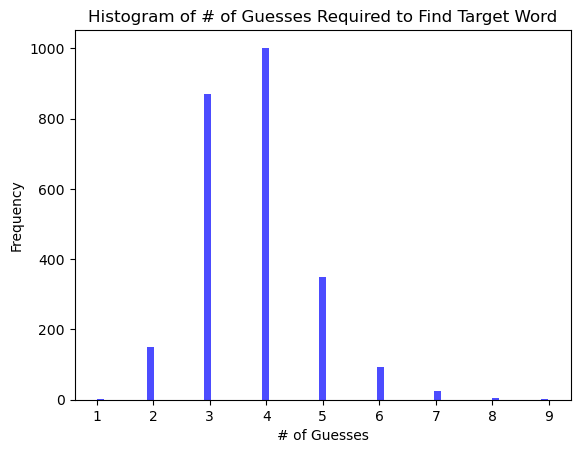

Mean: 3.7850280224179342
Number of elements >= 7: 32
Average streak: 78.125


In [189]:
import matplotlib.pyplot as plt

# Example list of numerical data
data = guesses

# Generate the histogram
plt.hist(data, bins='auto', color='blue', alpha=0.7, rwidth=0.85)

# Customize the histogram (optional)
plt.title('Histogram of # of Guesses Required to Find Target Word')
plt.xlabel('# of Guesses')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

import statistics

# Calculate the mean using statistics.mean()
mean_value = statistics.mean(data)

print("Mean:", mean_value)

# Initialize a counter variable to count elements >= 7
count_greater_than_or_equal_to_7 = 0

# Loop through the list and count elements >= 7
for num in data:
    if num >= 7:
        count_greater_than_or_equal_to_7 += 1

print("Number of elements >= 7:", count_greater_than_or_equal_to_7)

print("Average streak:", 2500/count_greater_than_or_equal_to_7)
